## In this file, we are analysing the capactiy of EWR airport in the years 2018,2019,2022 to find out whether capacity is the main reason for increasing delays at EWR airport in the year 2022.

In [6]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
#import the modules
import os
import pandas as pd
#read the path
file_path = "D:/UMBC ANIL/Spring 2023/DS 602 ML/Project/Data Set/Aviation Data/capacity"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list


['APM-Report-EWR-2018-Capacity.csv',
 'APM-Report-EWR-2019-Capacity.csv',
 'APM-Report-EWR-2022-Capacity.csv']

In [8]:
# combining all the data into single dataframe named 'data'
data = pd.concat([pd.read_csv(f) for f in file_list ], ignore_index=True)
data

,Date,Local\nHour,Departures\nFor\nEfficiency\nComputation,Arrivals\nFor\nEfficiency\nComputation,Total\nFor\nEfficiency\nComputation,Facility\nReported\nDepartures,Facility\nReported\nArrivals,Total\nFacility\nReported,Departure\nDemand\nUnits,Arrival\nDemand\nUnits,Total\nDemand\nUnits,Efficiency\nAAR,ADR,Capacity\nAAR,ADR Plus\nCapacity\nAAR,Average\nCapacity,% Capacity\nUtilized,Departure\nEfficiency,Arrival\nEfficiency,SAER
0,01-01-2018,0,4,6,10,0,0,0,7,6,13,40,40,40,80,80,12.50,57.14,100.00,76.92
1,01-01-2018,1,1,1,2,0,0,0,1,1,2,40,40,40,80,80,2.50,100.00,100.00,100.00
2,01-01-2018,2,0,3,3,0,0,0,0,3,3,40,40,40,80,80,3.75,100.00,100.00,100.00
3,01-01-2018,3,0,1,1,0,0,0,0,1,1,40,40,40,80,80,1.25,100.00,100.00,100.00
4,01-01-2018,4,0,4,4,0,0,0,0,4,4,40,40,40,80,80,5.00,100.00,100.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,11/30/2022,19,34,35,69,33,35,68,45,142,187,32,30,32,62,62,111.29,95.56,100.00,98.93
24044,11/30/2022,20,31,25,56,33,26,59,37,129,166,32,30,32,62,62,90.32,100.00,79.26,83.89
24045,11/30/2022,21,27,29,56,27,30,57,30,121,151,32,30,32,62,62,90.32,92.92,89.36,90.07
24046,11/30/2022,22,27,30,57,27,29,56,29,78,107,32,30,32,62,62,91.94,96.55,93.59,94.39


In [9]:
# converting datatype of 'Date' column into 'datetime' datatype

data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# printing the first five rows
data.head()

,Date,Local\nHour,Departures\nFor\nEfficiency\nComputation,Arrivals\nFor\nEfficiency\nComputation,Total\nFor\nEfficiency\nComputation,Facility\nReported\nDepartures,Facility\nReported\nArrivals,Total\nFacility\nReported,Departure\nDemand\nUnits,Arrival\nDemand\nUnits,Total\nDemand\nUnits,Efficiency\nAAR,ADR,Capacity\nAAR,ADR Plus\nCapacity\nAAR,Average\nCapacity,% Capacity\nUtilized,Departure\nEfficiency,Arrival\nEfficiency,SAER
0,2018-01-01,0,4,6,10,0,0,0,7,6,13,40,40,40,80,80,12.50,57.14,100.0,76.92
1,2018-01-01,1,1,1,2,0,0,0,1,1,2,40,40,40,80,80,2.50,100.00,100.0,100.00
2,2018-01-01,2,0,3,3,0,0,0,0,3,3,40,40,40,80,80,3.75,100.00,100.0,100.00
3,2018-01-01,3,0,1,1,0,0,0,0,1,1,40,40,40,80,80,1.25,100.00,100.0,100.00
4,2018-01-01,4,0,4,4,0,0,0,0,4,4,40,40,40,80,80,5.00,100.00,100.0,100.00


In [11]:
# viewing the first row with all columns

data.iloc[0,:]

Date                                        2018-01-01 00:00:00
Local\nHour                                                   0
Departures\nFor\nEfficiency\nComputation                      4
Arrivals\nFor\nEfficiency\nComputation                        6
Total\nFor\nEfficiency\nComputation                          10
Facility\nReported\nDepartures                                0
Facility\nReported\nArrivals                                  0
Total\nFacility\nReported                                     0
Departure\nDemand\nUnits                                      7
Arrival\nDemand\nUnits                                        6
Total\nDemand\nUnits                                         13
Efficiency\nAAR                                              40
ADR                                                          40
Capacity\nAAR                                                40
ADR Plus\nCapacity\nAAR                                      80
Average\nCapacity                       

In [12]:
# info of data frame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24048 entries, 0 to 24047
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   24048 non-null  datetime64[ns]
 1   Local
Hour                             24048 non-null  int64         
 2   Departures
For
Efficiency
Computation  24048 non-null  int64         
 3   Arrivals
For
Efficiency
Computation    24048 non-null  int64         
 4   Total
For
Efficiency
Computation       24048 non-null  int64         
 5   Facility
Reported
Departures           24048 non-null  int64         
 6   Facility
Reported
Arrivals             24048 non-null  int64         
 7   Total
Facility
Reported                24048 non-null  int64         
 8   Departure
Demand
Units                 24048 non-null  int64         
 9   Arrival
Demand
Units                   24048 non-null  int64 

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

In [14]:
data.head()

,Date,Local\nHour,Departures\nFor\nEfficiency\nComputation,Arrivals\nFor\nEfficiency\nComputation,Total\nFor\nEfficiency\nComputation,Facility\nReported\nDepartures,Facility\nReported\nArrivals,Total\nFacility\nReported,Departure\nDemand\nUnits,Arrival\nDemand\nUnits,Total\nDemand\nUnits,Efficiency\nAAR,ADR,Capacity\nAAR,ADR Plus\nCapacity\nAAR,Average\nCapacity,% Capacity\nUtilized,Departure\nEfficiency,Arrival\nEfficiency,SAER
0,2018-01-01,0,4,6,10,0,0,0,7,6,13,40,40,40,80,80,12.50,57.14,100.0,76.92
1,2018-01-01,1,1,1,2,0,0,0,1,1,2,40,40,40,80,80,2.50,100.00,100.0,100.00
2,2018-01-01,2,0,3,3,0,0,0,0,3,3,40,40,40,80,80,3.75,100.00,100.0,100.00
3,2018-01-01,3,0,1,1,0,0,0,0,1,1,40,40,40,80,80,1.25,100.00,100.0,100.00
4,2018-01-01,4,0,4,4,0,0,0,0,4,4,40,40,40,80,80,5.00,100.00,100.0,100.00


In [15]:
# we can see that datatype of 'Date' column is chnaged to 'datetime64
'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24048 entries, 0 to 24047
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   24048 non-null  datetime64[ns]
 1   Local
Hour                             24048 non-null  int64         
 2   Departures
For
Efficiency
Computation  24048 non-null  int64         
 3   Arrivals
For
Efficiency
Computation    24048 non-null  int64         
 4   Total
For
Efficiency
Computation       24048 non-null  int64         
 5   Facility
Reported
Departures           24048 non-null  int64         
 6   Facility
Reported
Arrivals             24048 non-null  int64         
 7   Total
Facility
Reported                24048 non-null  int64         
 8   Departure
Demand
Units                 24048 non-null  int64         
 9   Arrival
Demand
Units                   24048 non-null  int64 

In [16]:
# renaming the columns of dataframe for clarity

data.rename(columns = {
                        'Local\nHour'                                 :       'Local Hour',                   
                        'Departures\nFor\nEfficiency\nComputation'    :       'Departures For Efficiency Computation',       
                        'Arrivals\nFor\nEfficiency\nComputation'      :       'Arrivals For Efficiency Computation',
                        'Total\nFor\nEfficiency\nComputation'         :       'Total For Efficiency Computation',
                        'Facility\nReported\nDepartures'              :       'Facility Reported Departures',  
                        'Facility\nReported\nArrivals'                :       'Facility Reported Arrivals' ,
                        'Total\nFacility\nReported'                   :       'Total Facility Reported',
                        'Departure\nDemand\nUnits'                    :       'Departure Demand Units',
                        'Arrival\nDemand\nUnits'                      :       'Arrival Demand Units',
                        'Total\nDemand\nUnits'                        :       'Total Demand Units',
                        'Capacity\nAAR'                               :       'Capacity AAR',
                        'ADR Plus\nCapacity\nAAR'                     :       'ADR Plus Capacity AAR', 
                        'Average\nCapacity'                           :       'Average Capacity',
                        '% Capacity\nUtilized'                        :       '% Capacity Utilized',
                        'Departure\nEfficiency'                       :       'Departure Efficiency',       
                        'Arrival\nEfficiency'                         :       'Arrival Efficiency'   }, inplace = True)

In [17]:
data.head()

,Date,Local Hour,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,Facility Reported Departures,Facility Reported Arrivals,Total Facility Reported,Departure Demand Units,Arrival Demand Units,Total Demand Units,Efficiency\nAAR,ADR,Capacity AAR,ADR Plus Capacity AAR,Average Capacity,% Capacity Utilized,Departure Efficiency,Arrival Efficiency,SAER
0,2018-01-01,0,4,6,10,0,0,0,7,6,13,40,40,40,80,80,12.50,57.14,100.0,76.92
1,2018-01-01,1,1,1,2,0,0,0,1,1,2,40,40,40,80,80,2.50,100.00,100.0,100.00
2,2018-01-01,2,0,3,3,0,0,0,0,3,3,40,40,40,80,80,3.75,100.00,100.0,100.00
3,2018-01-01,3,0,1,1,0,0,0,0,1,1,40,40,40,80,80,1.25,100.00,100.0,100.00
4,2018-01-01,4,0,4,4,0,0,0,0,4,4,40,40,40,80,80,5.00,100.00,100.0,100.00


In [18]:
# grouping the 'data' dataframe by date to convert it into date wise date

data_date = data.groupby('Date').agg({
                                 'Departures For Efficiency Computation': 'sum', 
                                 'Arrivals For Efficiency Computation': 'sum', 
                                 'Total For Efficiency Computation': 'sum', 
                                 'Facility Reported Departures': 'sum', 
                                 'Facility Reported Arrivals': 'sum',
                                 'Total Facility Reported': 'sum',
                                  'Departure Demand Units': 'sum',
                                 'Arrival Demand Units': 'sum',    
                                 'Total Demand Units':'sum',
    
                                  'Capacity AAR': 'sum',
                                  'ADR Plus Capacity AAR': 'sum',
                                 'Average Capacity': 'sum',    
                                
                                 '% Capacity Utilized': 'mean', 
                                 'Departure Efficiency': 'mean',
                                 'Arrival Efficiency': 'mean', 
                                 'SAER': 'mean'   })

In [19]:
# resetting the index 

data_date = data_date.reset_index()

In [20]:
# In 'data_date' dataframe we can see that each row represents a separate date

data_date

,Date,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,Facility Reported Departures,Facility Reported Arrivals,Total Facility Reported,Departure Demand Units,Arrival Demand Units,Total Demand Units,Capacity AAR,ADR Plus Capacity AAR,Average Capacity,% Capacity Utilized,Departure Efficiency,Arrival Efficiency,SAER
0,2018-01-01,547,533,1080,520,504,1024,694,889,1583,960,1920,1920,56.250000,91.972917,96.333333,93.864167
1,2018-01-02,616,605,1221,561,540,1101,661,1050,1711,960,1920,1920,63.593750,97.884583,92.757917,94.658750
2,2018-01-03,635,616,1251,561,529,1090,710,635,1345,916,1897,1897,64.150417,97.791667,98.363333,97.980000
3,2018-01-04,74,84,158,37,43,80,116,96,212,801,1377,1377,11.010417,76.909583,91.893750,77.523750
4,2018-01-05,466,498,964,452,474,926,728,1544,2272,841,1752,1752,54.344583,80.087917,93.466250,86.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2022-11-26,536,519,1055,499,476,975,622,530,1152,936,1872,1872,55.237917,93.810417,98.795833,96.135000
998,2022-11-27,555,568,1123,520,517,1037,667,1367,2034,931,1862,1862,61.177500,94.122083,94.787500,94.171667
999,2022-11-28,601,609,1210,553,535,1088,797,916,1713,900,1800,1800,64.033750,94.568750,93.509583,93.553750
1000,2022-11-29,586,596,1182,535,531,1066,737,608,1345,906,1788,1788,62.518333,94.933333,98.112083,96.021250


In [21]:
data_date.columns

Index(['Date', 'Departures For Efficiency Computation',
       'Arrivals For Efficiency Computation',
       'Total For Efficiency Computation', 'Facility Reported Departures',
       'Facility Reported Arrivals', 'Total Facility Reported',
       'Departure Demand Units', 'Arrival Demand Units', 'Total Demand Units',
       'Capacity AAR', 'ADR Plus Capacity AAR', 'Average Capacity',
       '% Capacity Utilized', 'Departure Efficiency', 'Arrival Efficiency',
       'SAER'],
      dtype='object')

In [22]:
# Adding year-month column for analysis

data_date['year_month'] = data_date['Date'].dt.strftime('%Y-%m')

In [23]:
data_date

,Date,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,Facility Reported Departures,Facility Reported Arrivals,Total Facility Reported,Departure Demand Units,Arrival Demand Units,Total Demand Units,Capacity AAR,ADR Plus Capacity AAR,Average Capacity,% Capacity Utilized,Departure Efficiency,Arrival Efficiency,SAER,year_month
0,2018-01-01,547,533,1080,520,504,1024,694,889,1583,960,1920,1920,56.250000,91.972917,96.333333,93.864167,2018-01
1,2018-01-02,616,605,1221,561,540,1101,661,1050,1711,960,1920,1920,63.593750,97.884583,92.757917,94.658750,2018-01
2,2018-01-03,635,616,1251,561,529,1090,710,635,1345,916,1897,1897,64.150417,97.791667,98.363333,97.980000,2018-01
3,2018-01-04,74,84,158,37,43,80,116,96,212,801,1377,1377,11.010417,76.909583,91.893750,77.523750,2018-01
4,2018-01-05,466,498,964,452,474,926,728,1544,2272,841,1752,1752,54.344583,80.087917,93.466250,86.966667,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2022-11-26,536,519,1055,499,476,975,622,530,1152,936,1872,1872,55.237917,93.810417,98.795833,96.135000,2022-11
998,2022-11-27,555,568,1123,520,517,1037,667,1367,2034,931,1862,1862,61.177500,94.122083,94.787500,94.171667,2022-11
999,2022-11-28,601,609,1210,553,535,1088,797,916,1713,900,1800,1800,64.033750,94.568750,93.509583,93.553750,2022-11
1000,2022-11-29,586,596,1182,535,531,1066,737,608,1345,906,1788,1788,62.518333,94.933333,98.112083,96.021250,2022-11


In [24]:
# grouping the 'data_date' dataframe by month to convert it into monthly data frame

data_month = data_date.groupby('year_month').agg({
                                 'Departures For Efficiency Computation': 'sum', 
                                 'Arrivals For Efficiency Computation': 'sum', 
                                 'Total For Efficiency Computation': 'sum', 
                                 'Facility Reported Departures': 'sum', 
                                 'Facility Reported Arrivals': 'sum',
                                 'Total Facility Reported': 'sum',
                                  'Departure Demand Units': 'sum',
                                 'Arrival Demand Units': 'sum',    
                                 'Total Demand Units':'sum',
    
                                  'Capacity AAR': 'sum',
                                  'ADR Plus Capacity AAR': 'sum',
                                 'Average Capacity': 'sum',    
                                
                                 '% Capacity Utilized': 'mean', 
                                 'Departure Efficiency': 'mean',
                                 'Arrival Efficiency': 'mean', 
                                 'SAER': 'mean'   })

In [25]:
data_month.head()

,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,Facility Reported Departures,Facility Reported Arrivals,Total Facility Reported,Departure Demand Units,Arrival Demand Units,Total Demand Units,Capacity AAR,ADR Plus Capacity AAR,Average Capacity,% Capacity Utilized,Departure Efficiency,Arrival Efficiency,SAER
year_month,,,,,,,,,,,,,,,,
2018-01,17135,17118,34253,15826,15546,31372,22122,26177,48299,29315,58736,58736,57.744785,94.258306,96.147997,94.808280
2018-02,16238,16175,32413,14713,14583,29296,21184,26800,47984,26081,52516,52516,61.624568,94.950908,96.325208,95.277887
2018-03,17852,17834,35686,16123,15974,32097,23538,27864,51402,29168,58410,58410,60.663508,92.969046,96.036156,93.771008
2018-04,18436,18419,36855,16548,16544,33092,25570,33836,59406,27973,56070,56070,65.706958,95.296208,95.324931,95.174764
2018-05,19459,19412,38871,16982,16934,33916,25709,32824,58533,28831,57898,57898,67.128051,94.260081,95.590054,94.945309


In [26]:
# resetting the index
data_month = data_month.reset_index()

In [27]:
data_month.head()

,year_month,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,Facility Reported Departures,Facility Reported Arrivals,Total Facility Reported,Departure Demand Units,Arrival Demand Units,Total Demand Units,Capacity AAR,ADR Plus Capacity AAR,Average Capacity,% Capacity Utilized,Departure Efficiency,Arrival Efficiency,SAER
0,2018-01,17135,17118,34253,15826,15546,31372,22122,26177,48299,29315,58736,58736,57.744785,94.258306,96.147997,94.808280
1,2018-02,16238,16175,32413,14713,14583,29296,21184,26800,47984,26081,52516,52516,61.624568,94.950908,96.325208,95.277887
2,2018-03,17852,17834,35686,16123,15974,32097,23538,27864,51402,29168,58410,58410,60.663508,92.969046,96.036156,93.771008
3,2018-04,18436,18419,36855,16548,16544,33092,25570,33836,59406,27973,56070,56070,65.706958,95.296208,95.324931,95.174764
4,2018-05,19459,19412,38871,16982,16934,33916,25709,32824,58533,28831,57898,57898,67.128051,94.260081,95.590054,94.945309


In [28]:
# converting the 'year_month' column into 'YYYY-MM-DD' format to extract year and month
data_month['date'] = pd.to_datetime(data_month['year_month'] + '-01')

# Extract the month and year values into separate columns
data_month['month'] = data_month['date'].dt.month
data_month['year'] =data_month['date'].dt.year

In [29]:
data_month.head()

,year_month,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,Facility Reported Departures,Facility Reported Arrivals,Total Facility Reported,Departure Demand Units,Arrival Demand Units,Total Demand Units,Capacity AAR,ADR Plus Capacity AAR,Average Capacity,% Capacity Utilized,Departure Efficiency,Arrival Efficiency,SAER,date,month,year
0,2018-01,17135,17118,34253,15826,15546,31372,22122,26177,48299,29315,58736,58736,57.744785,94.258306,96.147997,94.808280,2018-01-01,1,2018
1,2018-02,16238,16175,32413,14713,14583,29296,21184,26800,47984,26081,52516,52516,61.624568,94.950908,96.325208,95.277887,2018-02-01,2,2018
2,2018-03,17852,17834,35686,16123,15974,32097,23538,27864,51402,29168,58410,58410,60.663508,92.969046,96.036156,93.771008,2018-03-01,3,2018
3,2018-04,18436,18419,36855,16548,16544,33092,25570,33836,59406,27973,56070,56070,65.706958,95.296208,95.324931,95.174764,2018-04-01,4,2018
4,2018-05,19459,19412,38871,16982,16934,33916,25709,32824,58533,28831,57898,57898,67.128051,94.260081,95.590054,94.945309,2018-05-01,5,2018


In [30]:
# dropping the 'date' column as we now have individual columns of month and year

data_month = data_month.drop('date', axis=1)

In [31]:
data_month.head()

,year_month,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,Facility Reported Departures,Facility Reported Arrivals,Total Facility Reported,Departure Demand Units,Arrival Demand Units,Total Demand Units,Capacity AAR,ADR Plus Capacity AAR,Average Capacity,% Capacity Utilized,Departure Efficiency,Arrival Efficiency,SAER,month,year
0,2018-01,17135,17118,34253,15826,15546,31372,22122,26177,48299,29315,58736,58736,57.744785,94.258306,96.147997,94.808280,1,2018
1,2018-02,16238,16175,32413,14713,14583,29296,21184,26800,47984,26081,52516,52516,61.624568,94.950908,96.325208,95.277887,2,2018
2,2018-03,17852,17834,35686,16123,15974,32097,23538,27864,51402,29168,58410,58410,60.663508,92.969046,96.036156,93.771008,3,2018
3,2018-04,18436,18419,36855,16548,16544,33092,25570,33836,59406,27973,56070,56070,65.706958,95.296208,95.324931,95.174764,4,2018
4,2018-05,19459,19412,38871,16982,16934,33916,25709,32824,58533,28831,57898,57898,67.128051,94.260081,95.590054,94.945309,5,2018


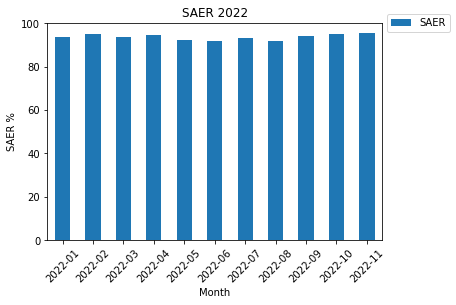

In [32]:
# Bar plot of SAER of year 2022

filter=(data_month['year']==2022)
data_month[filter]

# plot a bar chart of the scores
ax = data_month[filter].plot.bar(x='year_month', y='SAER', rot=0)

# set the plot title and axis labels
ax.set_title('SAER 2022')
ax.set_xlabel('Month')
ax.set_ylabel('SAER %')
ax.set_xticklabels(data_month[filter]['year_month'], rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
# show the plot
plt.show()

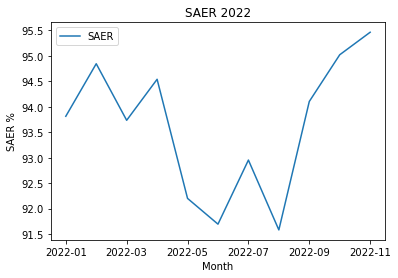

In [33]:
# Line plot of SAER of year 2022

filter = (data_month['year'] == 2022)
data_year = data_month[filter]

# plot a line chart of the scores
ax = data_year.plot.line(x='year_month', y='SAER')

# set the plot title and axis labels
ax.set_title('SAER 2022')
ax.set_xlabel('Month')
ax.set_ylabel('SAER %')

# show the plot
plt.show()


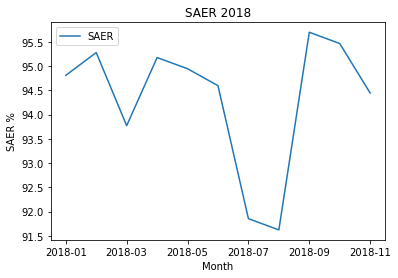

In [34]:
# Line plot of SAER of year 2018

filter = (data_month['year'] == 2018)
data_year = data_month[filter]

# plot a line chart of the scores
ax = data_year.plot.line(x='year_month', y='SAER')

# set the plot title and axis labels
ax.set_title('SAER 2018')
ax.set_xlabel('Month')
ax.set_ylabel('SAER %')

# show the plot
plt.show()


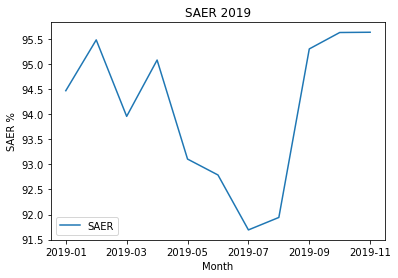

In [35]:
# Line plot of SAER of year 2019

filter = (data_month['year'] == 2019)
data_year = data_month[filter]

# plot a line chart of the scores
ax = data_year.plot.line(x='year_month', y='SAER')

# set the plot title and axis labels
ax.set_title('SAER 2019')
ax.set_xlabel('Month')
ax.set_ylabel('SAER %')

# show the plot
plt.show()


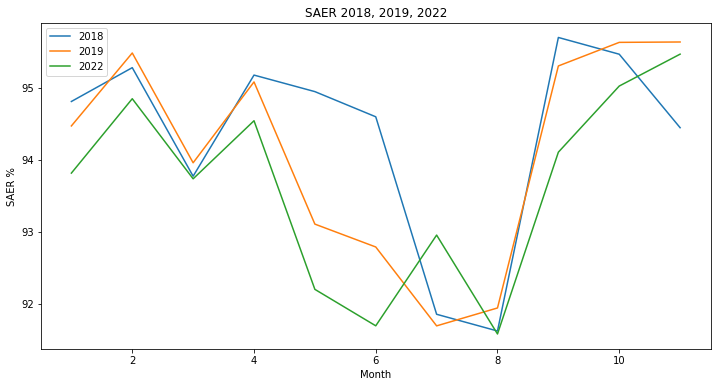

In [45]:
#combined line plot of SAER of EWR airport foe the years 2018, 2019, 2022

# create filters for each year
filter_2018 = (data_month['year'] == 2018)
filter_2019 = (data_month['year'] == 2019)
filter_2022 = (data_month['year'] == 2022)

# create a dataframe for each year
data_2018 = data_month[filter_2018]
data_2019 = data_month[filter_2019]
data_2022 = data_month[filter_2022]

# plot a line chart of the scores for each year
ax = data_2018.plot.line(x='month', y='SAER', label='2018', figsize=(12, 6))
data_2019.plot.line(x='month', y='SAER', ax=ax, label='2019')
data_2022.plot.line(x='month', y='SAER', ax=ax, label='2022')


# set the plot title and axis labels
ax.set_title('SAER 2018, 2019, 2022')
ax.set_xlabel('Month')
ax.set_ylabel('SAER %')

# show the plot
plt.show()


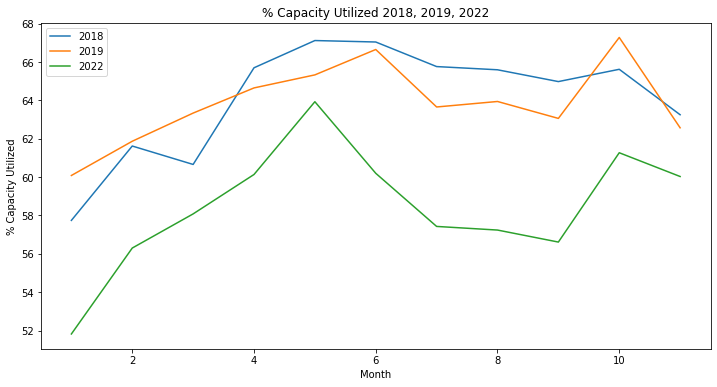

In [46]:
#combined line plot of %capacity utilised of EWR airport foe the years 2018, 2019, 2022

# create filters for each year
filter_2018 = (data_month['year'] == 2018)
filter_2019 = (data_month['year'] == 2019)
filter_2022 = (data_month['year'] == 2022)

# create a dataframe for each year
data_2018 = data_month[filter_2018]
data_2019 = data_month[filter_2019]
data_2022 = data_month[filter_2022]

# plot a line chart of the scores for each year
ax = data_2018.plot.line(x='month', y='% Capacity Utilized', label='2018', figsize=(12, 6))
data_2019.plot.line(x='month', y='% Capacity Utilized', ax=ax, label='2019')
data_2022.plot.line(x='month', y='% Capacity Utilized', ax=ax, label='2022')


# set the plot title and axis labels
ax.set_title('% Capacity Utilized 2018, 2019, 2022')
ax.set_xlabel('Month')
ax.set_ylabel('% Capacity Utilized')

# show the plot
plt.show()


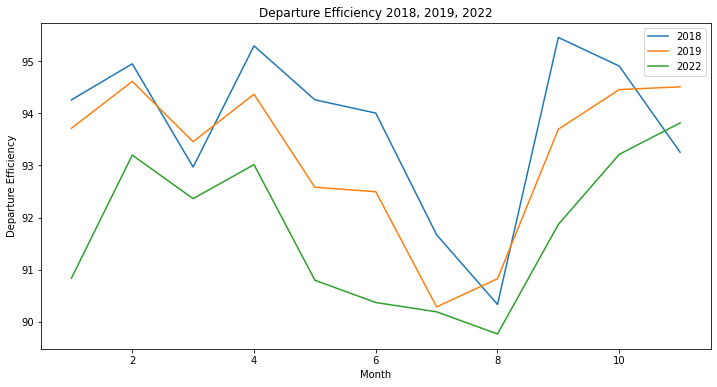

In [47]:
#combined line plot ofdeparture efficiency of EWR airport foe the years 2018, 2019, 2022


# create filters for each year
filter_2018 = (data_month['year'] == 2018)
filter_2019 = (data_month['year'] == 2019)
filter_2022 = (data_month['year'] == 2022)

# create a dataframe for each year
data_2018 = data_month[filter_2018]
data_2019 = data_month[filter_2019]
data_2022 = data_month[filter_2022]

# plot a line chart of the scores for each year
ax = data_2018.plot.line(x='month', y='Departure Efficiency', label='2018', figsize=(12, 6))
data_2019.plot.line(x='month', y='Departure Efficiency', ax=ax, label='2019')
data_2022.plot.line(x='month', y='Departure Efficiency', ax=ax, label='2022')


# set the plot title and axis labels
ax.set_title('Departure Efficiency 2018, 2019, 2022')
ax.set_xlabel('Month')
ax.set_ylabel('Departure Efficiency')

# show the plot
plt.show()


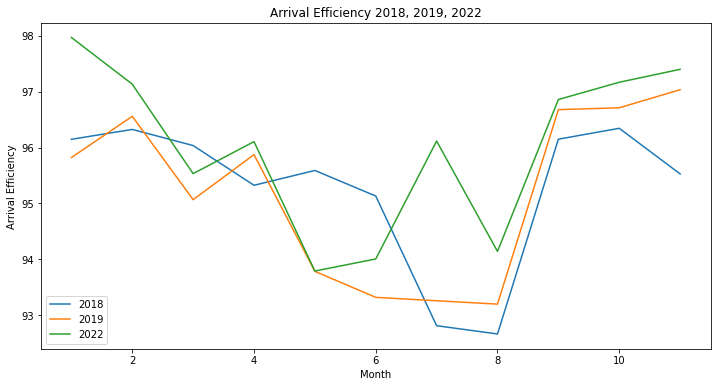

In [48]:
#combined line plot of arraival efficiency of EWR airport foe the years 2018, 2019, 2022

# create filters for each year
filter_2018 = (data_month['year'] == 2018)
filter_2019 = (data_month['year'] == 2019)
filter_2022 = (data_month['year'] == 2022)

# create a dataframe for each year
data_2018 = data_month[filter_2018]
data_2019 = data_month[filter_2019]
data_2022 = data_month[filter_2022]

# plot a line chart of the scores for each year
ax = data_2018.plot.line(x='month', y='Arrival Efficiency', label='2018', figsize=(12, 6))
data_2019.plot.line(x='month', y='Arrival Efficiency', ax=ax, label='2019')
data_2022.plot.line(x='month', y='Arrival Efficiency', ax=ax, label='2022')


# set the plot title and axis labels
ax.set_title('Arrival Efficiency 2018, 2019, 2022')
ax.set_xlabel('Month')
ax.set_ylabel('Arrival Efficiency')

# show the plot
plt.show()


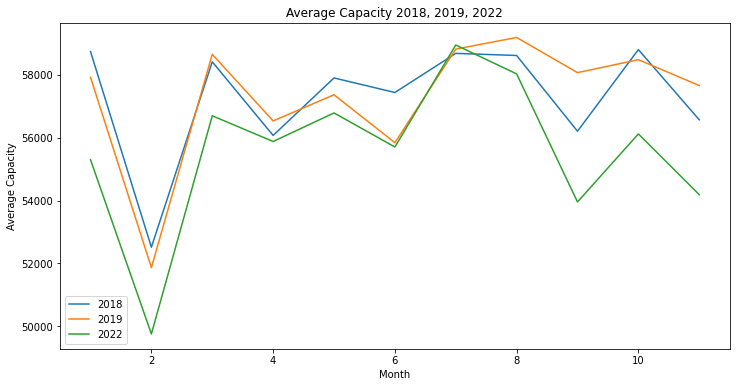

In [49]:
#combined line plot of average capacity of EWR airport foe the years 2018, 2019, 2022

# create filters for each year
filter_2018 = (data_month['year'] == 2018)
filter_2019 = (data_month['year'] == 2019)
filter_2022 = (data_month['year'] == 2022)

# create a dataframe for each year
data_2018 = data_month[filter_2018]
data_2019 = data_month[filter_2019]
data_2022 = data_month[filter_2022]

# plot a line chart of the scores for each year
ax = data_2018.plot.line(x='month', y='Average Capacity', label='2018', figsize=(12, 6))
data_2019.plot.line(x='month', y='Average Capacity', ax=ax, label='2019')
data_2022.plot.line(x='month', y='Average Capacity', ax=ax, label='2022')


# set the plot title and axis labels
ax.set_title('Average Capacity 2018, 2019, 2022')
ax.set_xlabel('Month')
ax.set_ylabel('Average Capacity')

# show the plot
plt.show()
